# Batch Gradient Descent & Stochastic Gradient Descent

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [4]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
8,1310,3,50.0
14,2250,3,101.0
16,1180,3,48.0
17,1540,3,60.0


In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y=scaled_y.reshape(20,)

## Batch Gradient Descent

In [6]:
def BGD(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))# initalize wieght with zero 
    b = 0 #initilize bias with zero
    total_samples = X.shape[0] # number of rows in X
    
    #cost and epoch list for visualisation
    cost_list = [] 
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # y = weightn * xn + bias
        
        #derivatives
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) 
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        #updated  weight and bias
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:# at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


In [7]:
w, b, cost, cost_list, epoch_list = BGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

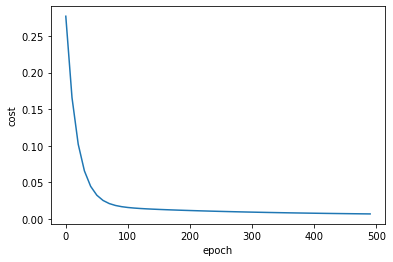

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list);

## Stochastic Gradient Descent

In [9]:
def SGD(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) # initalize wieght with zero 
    b = 0 #initilize bias with zero
    total_samples = X.shape[0] # number of rows in X
    
    #cost and epoch list for visualisation
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index] # random X
        sample_y = y_true[random_index] # random y
        
        y_predicted = np.dot(w, sample_x.T) + b # y = weightn * xn + bias
        
        #derivatives
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        #updated  weight and bias
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [10]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70928447, 0.67565148]), -0.23109787184182487, 0.023808794868577267)

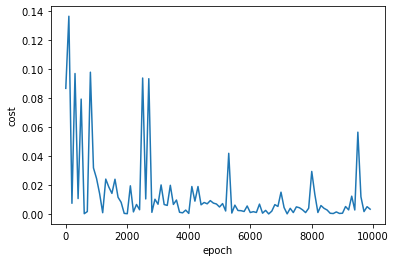

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)